In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load
file = '../fakedata.csv'  # Update later
df = pd.read_csv(file)
df = df[['Time Period','UserID','Date','Value 1']]

# Delete later if not needed
df['Date'] = pd.to_datetime(df['Date'])


In [3]:
# Time A v B
time_a_values = df[df["Time Period"] == "Time A"]["Value 1"]
time_b_values = df[df["Time Period"] == "Time B"]["Value 1"]

# Combine for continuous analysis
combined_values = pd.concat([time_a_values, time_b_values]).reset_index(drop=True)

# Calculate the baseline mean and stdev - baseline Time A
mean = time_a_values.mean()
std = time_a_values.std()

k = 0.5 * std # Reference value
h = 5 * std # Control limit

# Init CUSUM lists
cusum_pos = [0]
cusum_neg = [0]

# CUMSUM calculation
for x in combined_values:
    cusum_pos.append(max(0, cusum_pos[-1] + (x - mean - k)))
    cusum_neg.append(min(0, cusum_neg[-1] + (x - mean + k)))

# Detect shifts
if max(cusum_pos) > h or min(cusum_neg) < -h:
    print("Shift detected in the process!")
else:
    print("No significant shift detected.")


Shift detected in the process!


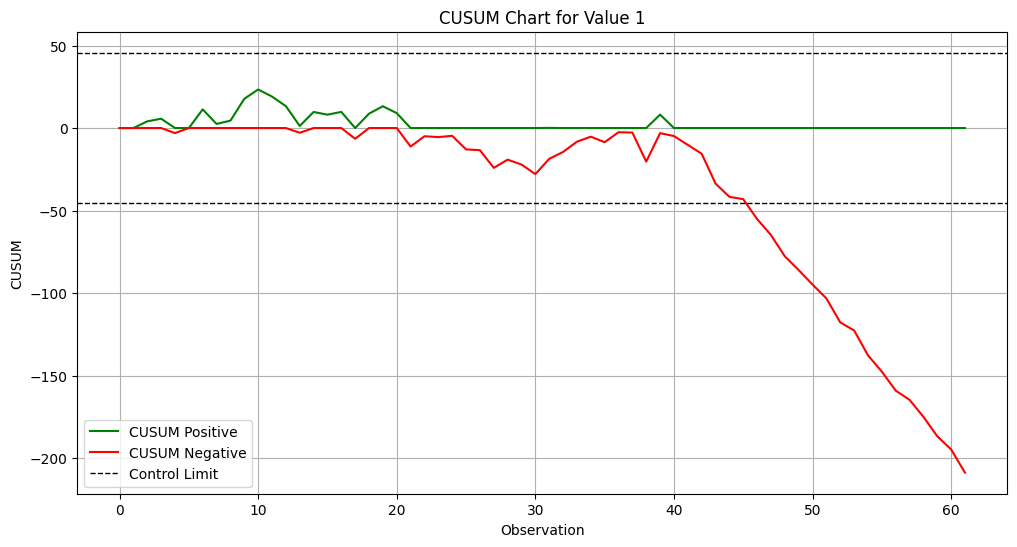

In [4]:
# Prep for plotting
cusum_pos = cusum_pos[1:]
cusum_neg = cusum_neg[1:]

# Create CUSUM chart
plt.figure(figsize=(12, 6))
plt.plot(cusum_pos, label='CUSUM Positive', color='green', linestyle='-')
plt.plot(cusum_neg, label='CUSUM Negative', color='red', linestyle='-')
plt.axhline(h, color='black', linestyle='--', linewidth=1, label='Control Limit')
plt.axhline(-h, color='black', linestyle='--', linewidth=1)
plt.title('CUSUM Chart for Value 1')
plt.xlabel('Observation')
plt.ylabel('CUSUM')
plt.legend()
plt.grid(True)
plt.show()